In [1]:
import sys
import gc
import os
import re
import time
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
# import chromedriver_autoinstaller

from matplotlib import font_manager as fm
from matplotlib import rc
# 차트에서 한글 출력을 위한 설정


import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = fm.FontProperties(fname=ttf).get_name()
    
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common. by import By

from bs4 import BeautifulSoup 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import konlpy
from konlpy.tag import Okt
from konlp.kma.klt2023 import klt2023
import nltk
import stanza
from gensim.models import Word2Vec, word2vec
from gensim.models import FastText

from wordcloud import WordCloud
from numpy import dot
from numpy.linalg import norm
import itertools

import matplotlib as mpl
import networkx as nx

import textrank_KLT2023 as klt

In [3]:
def get_keywords():
    text = klt.get_text()    # news URL, text file name, or 'quit'
    if text == 'quit':
          exit()
    
    sentences = klt.text2sentences(' '.join(text))
    nouns = klt.get_nouns(sentences)

    graph_sentence = klt.sentence_graph(nouns) # sentence to sentence graph
    graph_word, idx2word = klt.word_graph(nouns) # word to word graph

    rank_sentence = klt.get_ranks(graph_sentence) 
    sort_rank_sent = sorted(rank_sentence, key = lambda x:rank_sentence[x], reverse = True) # top rank sort
    rank_word = klt.get_ranks(graph_word) 

    sort_rank_word = sorted(rank_word, key = lambda x:rank_word[x], reverse = True) # top rank sort
    
    return rank_word,sort_rank_word,idx2word

def setEdges_keywords(seed='keywords', n=20):
    rank_word,idx,idx2word=get_keywords()

    #centerword = seed
    centerword = idx2word[idx[0]]

    G=nx.Graph()
    n=min(n,len(rank_word))
    for i in range(1,n):
            G.add_edge(centerword,idx2word[idx[i]],weight=round(rank_word[idx[i]],2))

    return G

def visualization(G,imageFileName,nodecolor='skyblue',edgelabel='yes'):
    plt.figure(figsize=(15, 15), dpi=80)

    font_name = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    mpl.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

    elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >0.5]
    esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=0.5]

    pos=nx.spring_layout(G) # positions for all nodes

    # nodes
    d = dict(G.degree)
    nx.draw_networkx_nodes(G,pos,node_size=[v*100+1000 for v in d.values()],
            node_color=nodecolor)       #default color: '#1f78b4'

    # edges
    nx.draw_networkx_edges(G,pos,edgelist=elarge,
            width=1.2,edge_color='blue')
    nx.draw_networkx_edges(G,pos,edgelist=esmall,
            width=1.2,alpha=0.5,edge_color='b',style='dashed')

    # edge labels
    if edgelabel=='yes':
        edge_weight = nx.get_edge_attributes(G,'weight')
        nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_weight)

    # labels
    nx.draw_networkx_labels(G,pos,font_family=font_name,font_size=14)

    plt.axis('off')
    plt.savefig('%s' %(imageFileName)) # save as png
    print('It was saved %s' %(imageFileName))
    plt.show() # display


def plot4kcc_keywords(catego):
    kword="KEYWORDS"
    color='skyblue'         # default: '#1f78b4'
    nsim1=10; nsim2=5      # number of similar words at level 1, 2
    elabel='yes'

    if len(sys.argv)==2:
            kword=sys.argv[1]
    elif len(sys.argv)==3:
            kword=sys.argv[1]; elabel=sys.argv[2] # yes / no
    elif len(sys.argv)==4:
            kword=sys.argv[1]; elabel=sys.argv[2]; color=sys.argv[3];
    elif len(sys.argv)==5:
            kword=sys.argv[1]; elabel=sys.argv[2]; # yes / no
            color=sys.argv[3]; nsim1=int(sys.argv[4]);
    elif len(sys.argv)==6:
            kword=sys.argv[1]; elabel=sys.argv[2]; # yes / no
            color=sys.argv[3]; nsim1=int(sys.argv[4]); nsim2=int(sys.argv[5])
    else:
            print("C> test.py keyword yes/no color nsim1 nsim2 True")
    
    G=setEdges_keywords(kword,nsim1)
    fileName = f"visualization/{'_'.join(catego.split('/'))}_keywords.png"     # filename to save a image
    visualization(G,fileName,nodecolor=color,edgelabel=elabel)
    exit()

### 1) 소설

csv name: book_all
Category :소설
It was saved visualization/소설_keywords.png


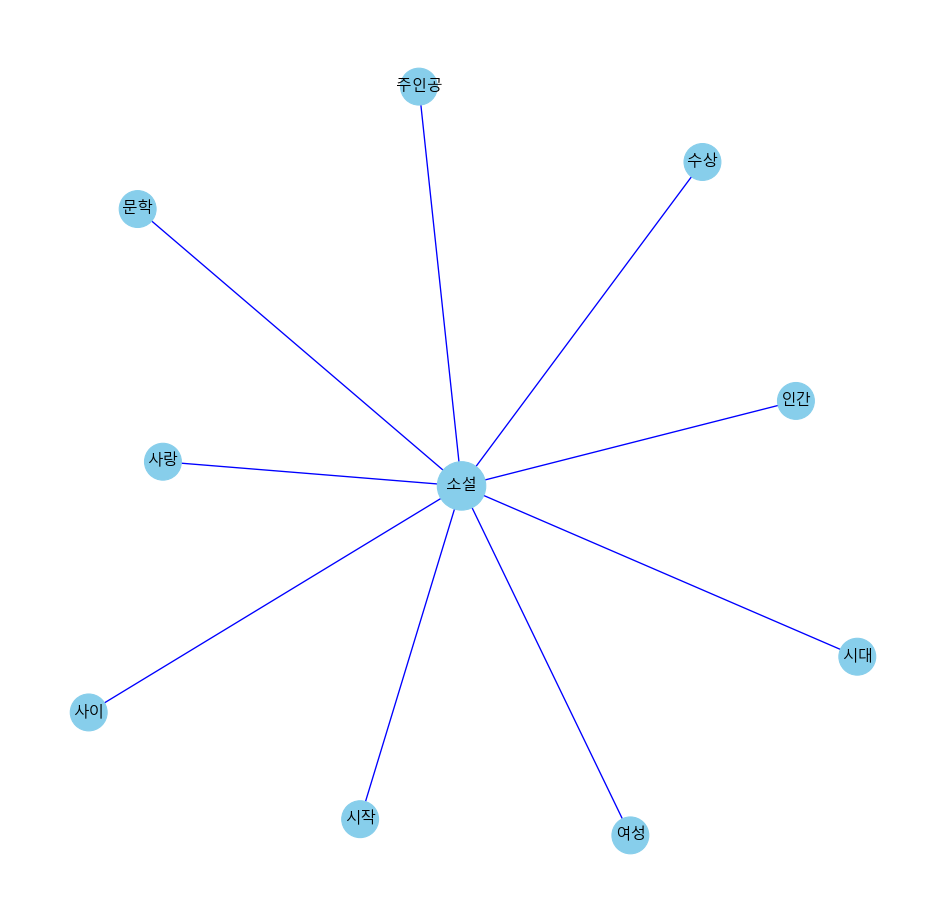

In [4]:
plot4kcc_keywords('소설')

### 2) 시/에세이

csv name: book_all
Category :시/에세이
It was saved visualization/시_에세이_keywords.png


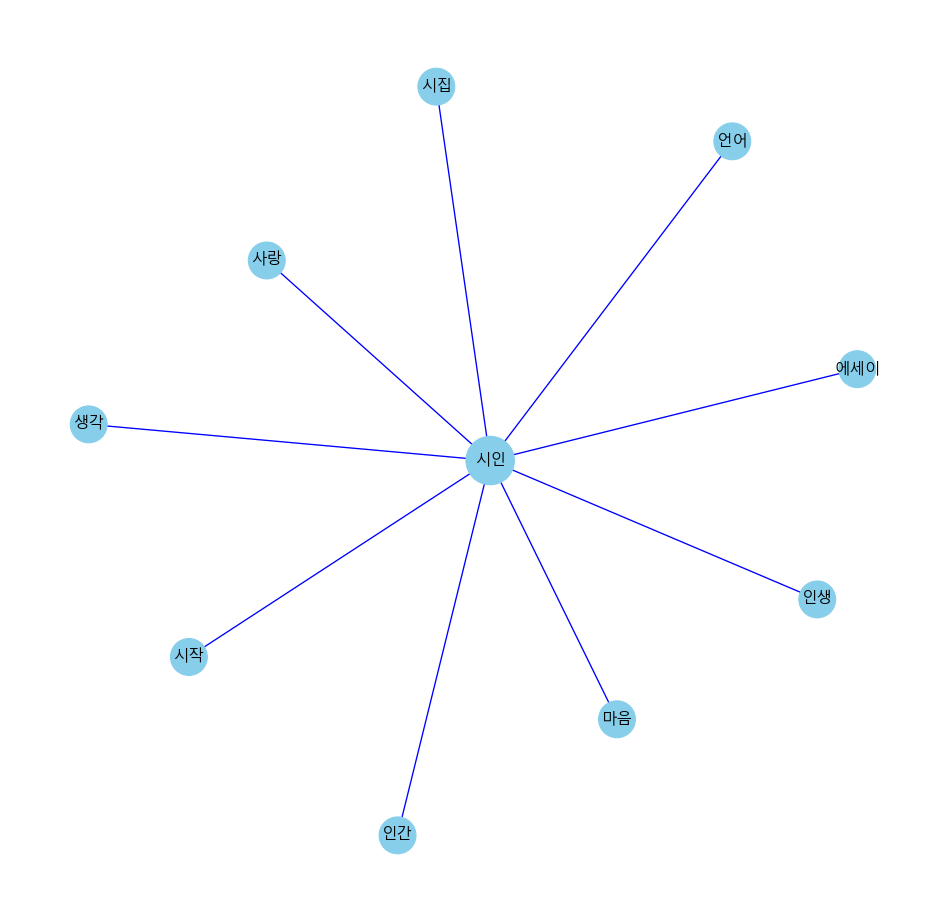

In [4]:
plot4kcc_keywords('시/에세이')

### 3) 인문

csv name: book_all
Category :인문
It was saved visualization/인문_keywords.png


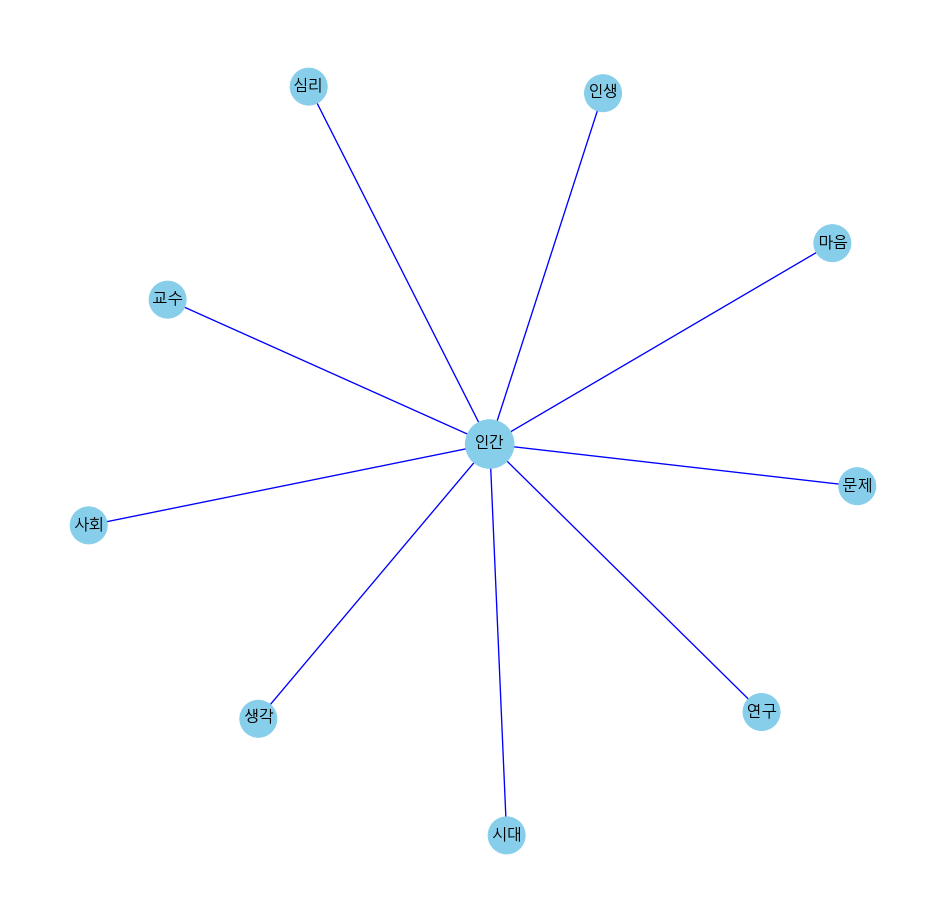

In [4]:
plot4kcc_keywords('인문')

### 4) 가정/육아

csv name: book_all
Category :가정/육아
It was saved visualization/가정_육아_keywords.png


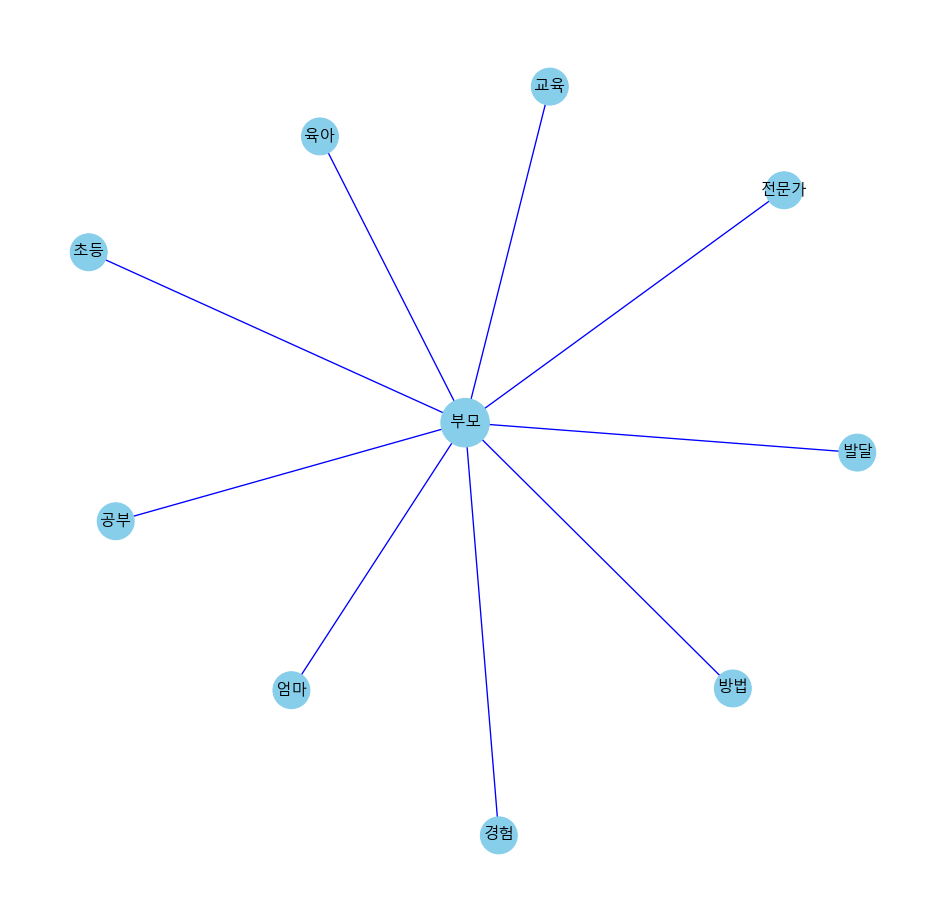

In [4]:
plot4kcc_keywords('가정/육아')

### 5) 요리

csv name: book_all
Category :요리
It was saved visualization/요리_keywords.png


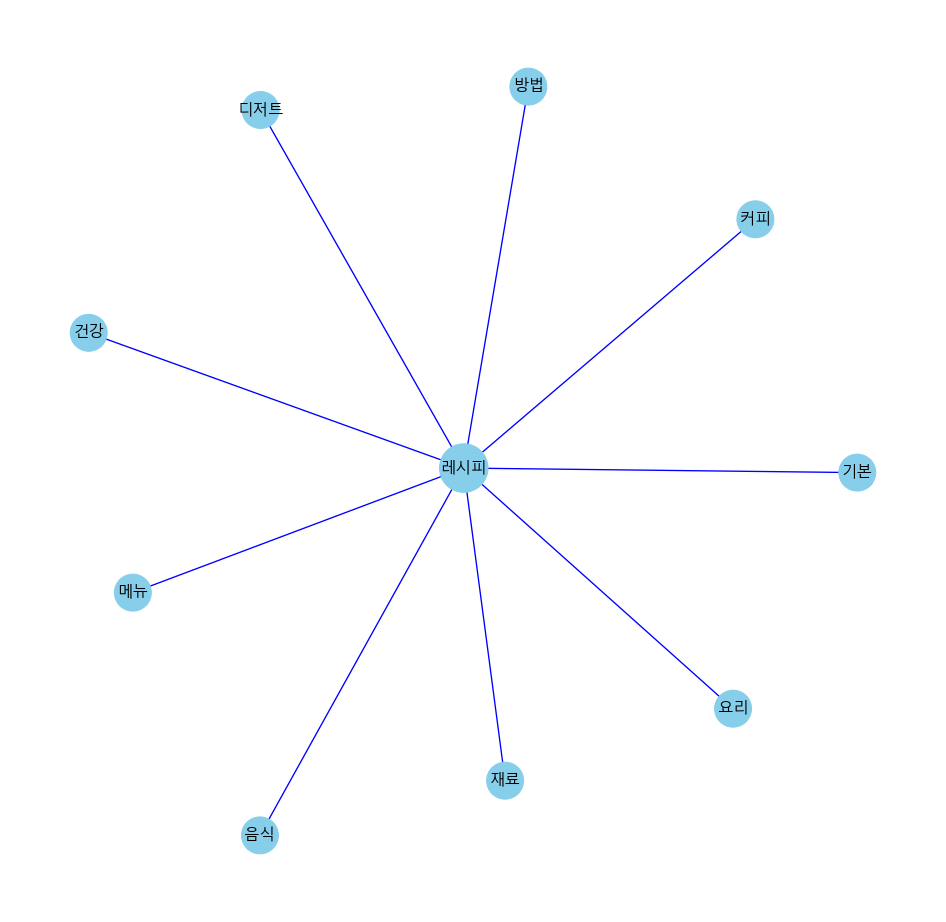

In [4]:
plot4kcc_keywords('요리')

### 6) 건강

csv name: book_all
Category :건강
It was saved visualization/건강_keywords.png


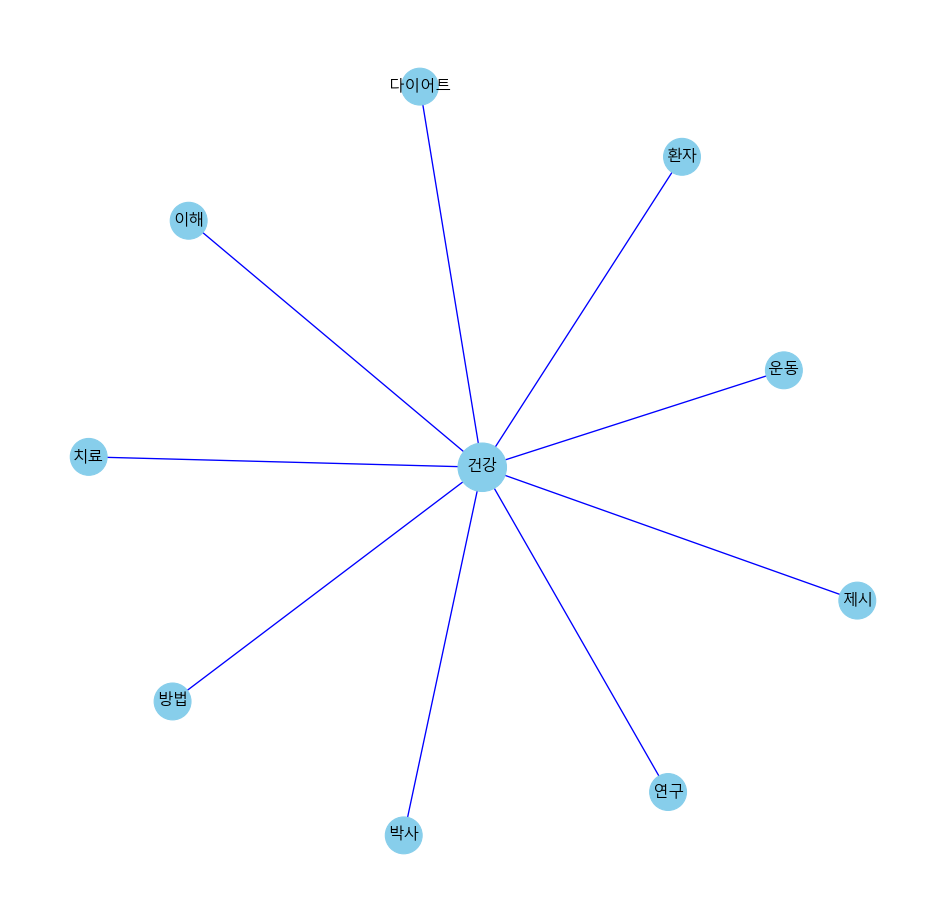

In [4]:
plot4kcc_keywords('건강')

### 7) 취미/실용/스포츠

csv name: book_all
Category :취미/실용/스포츠
It was saved visualization/취미_실용_스포츠_keywords.png


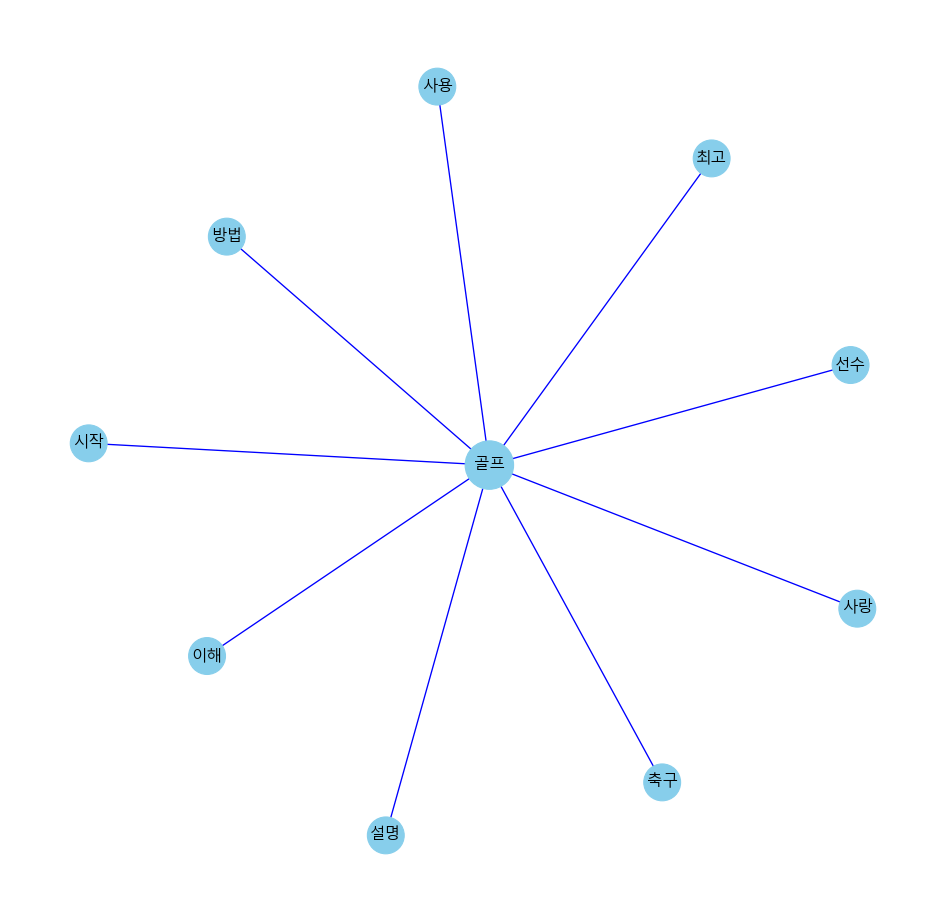

In [4]:
plot4kcc_keywords('취미/실용/스포츠')

### 8) 경제/경영

csv name: book_all
Category :경제/경영
It was saved visualization/경제_경영_keywords.png


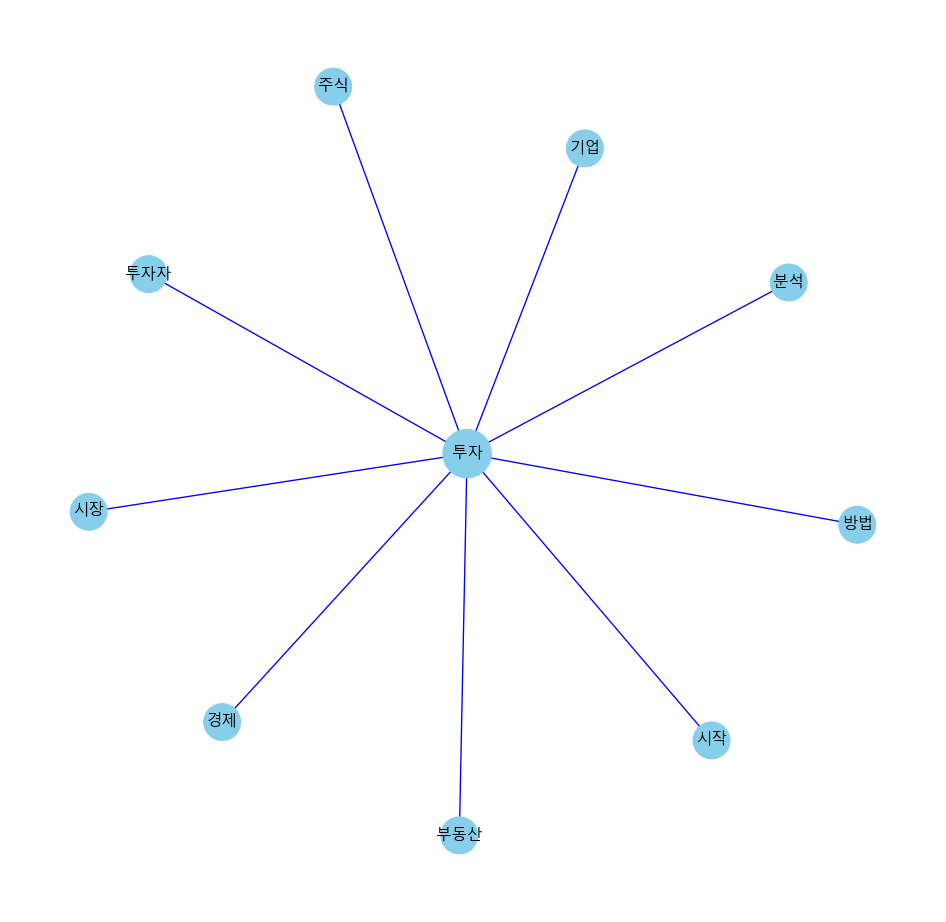

In [4]:
plot4kcc_keywords('경제/경영')

### 9) 자기계발

csv name: book_all
Category :자기계발
It was saved visualization/자기계발_keywords.png


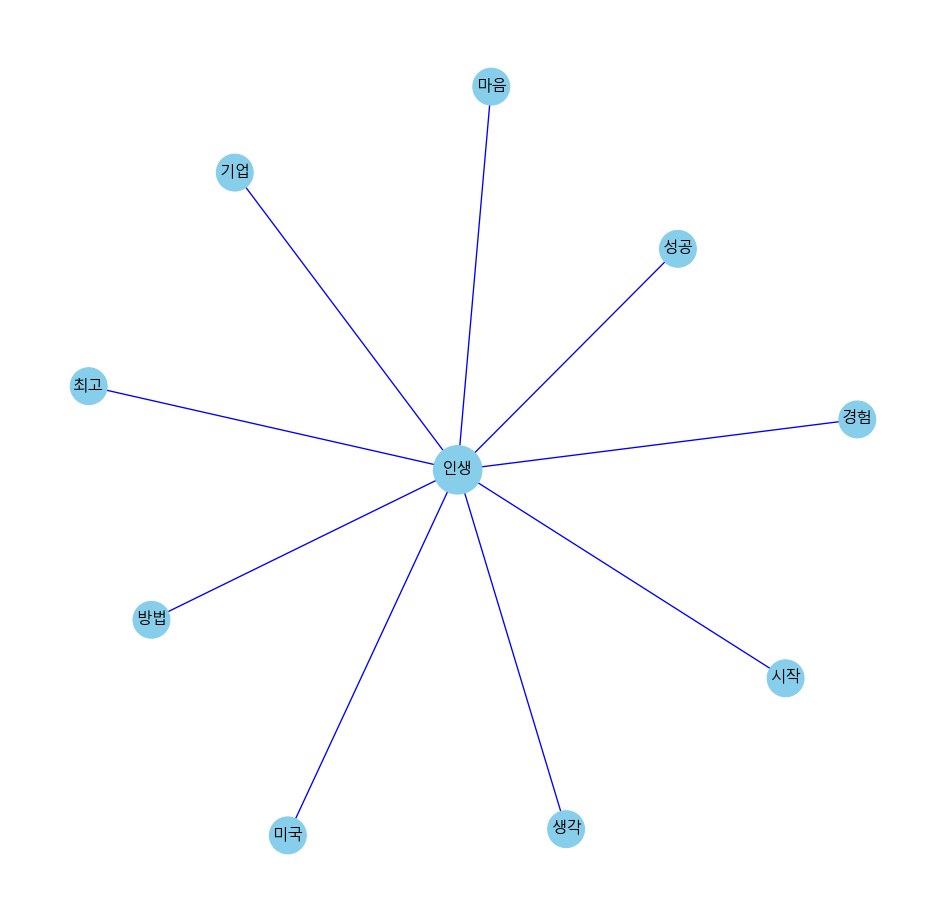

In [4]:
plot4kcc_keywords('자기계발')

### 10) 정치/사회

csv name: book_all
Category :정치/사회
It was saved visualization/정치_사회_keywords.png


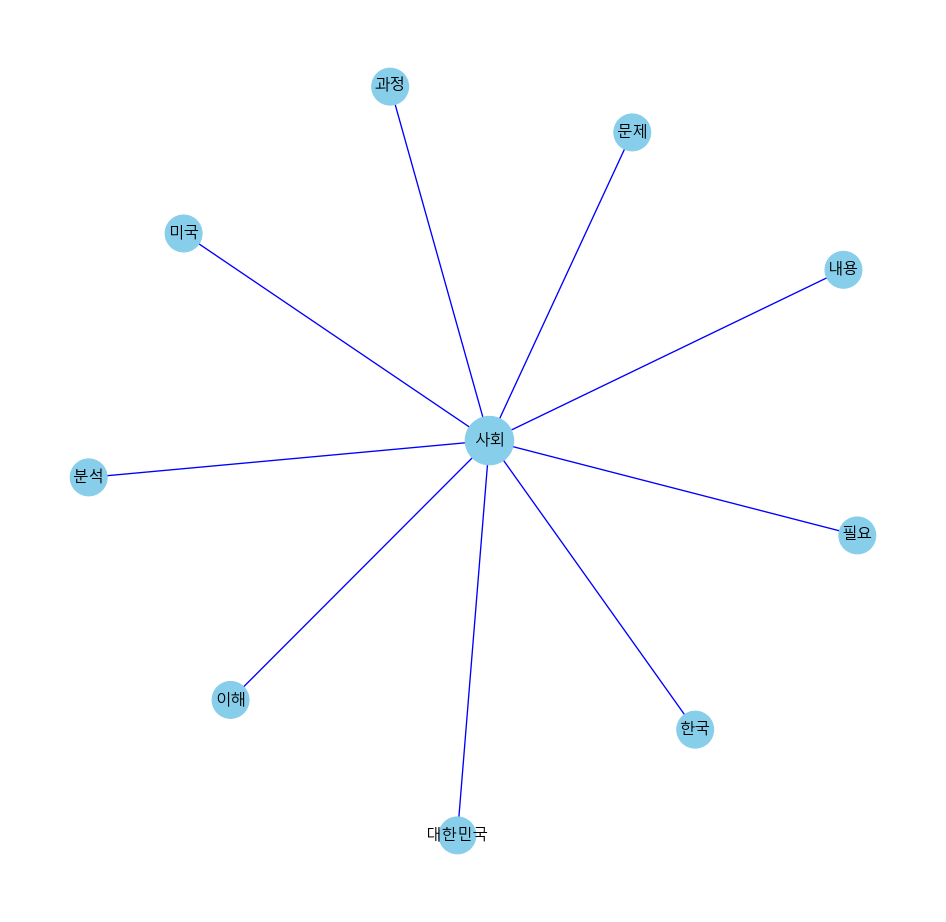

In [7]:
plot4kcc_keywords('정치/사회')

### 11) 역사/문화

csv name: book_all
Category :역사/문화
It was saved visualization/역사_문화_keywords.png


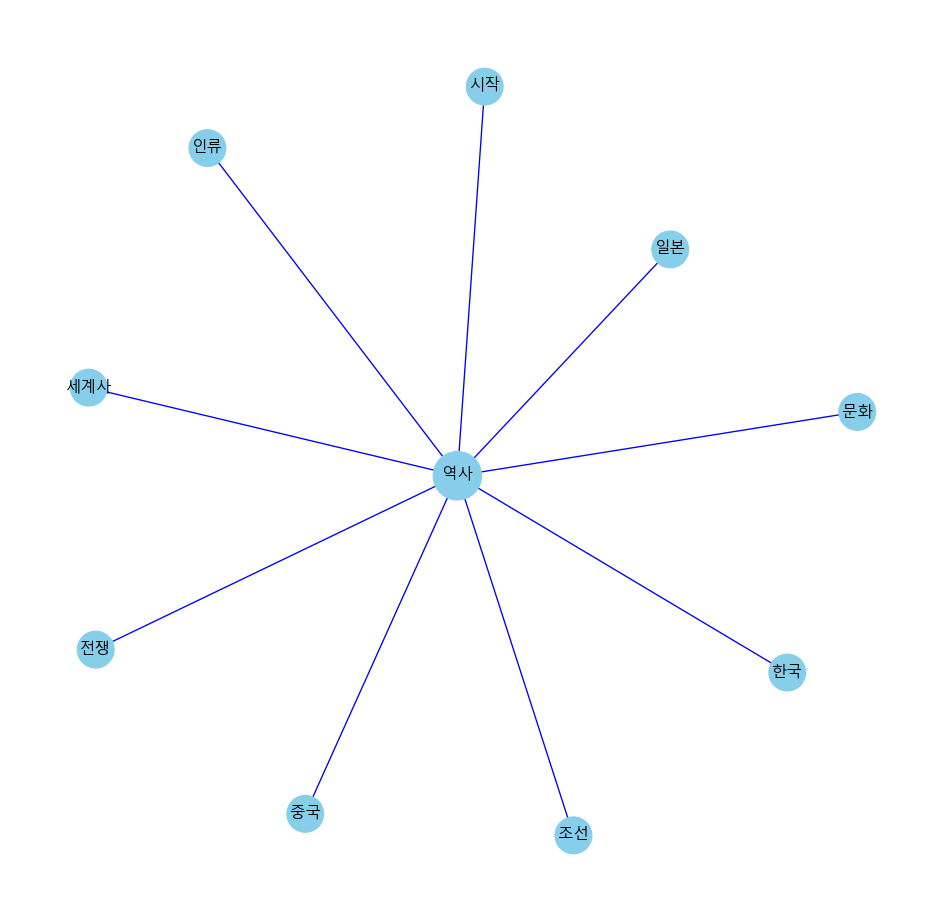

In [4]:
plot4kcc_keywords('역사/문화')

### 12) 종교

csv name: book_all
Category :종교
It was saved visualization/종교_keywords.png


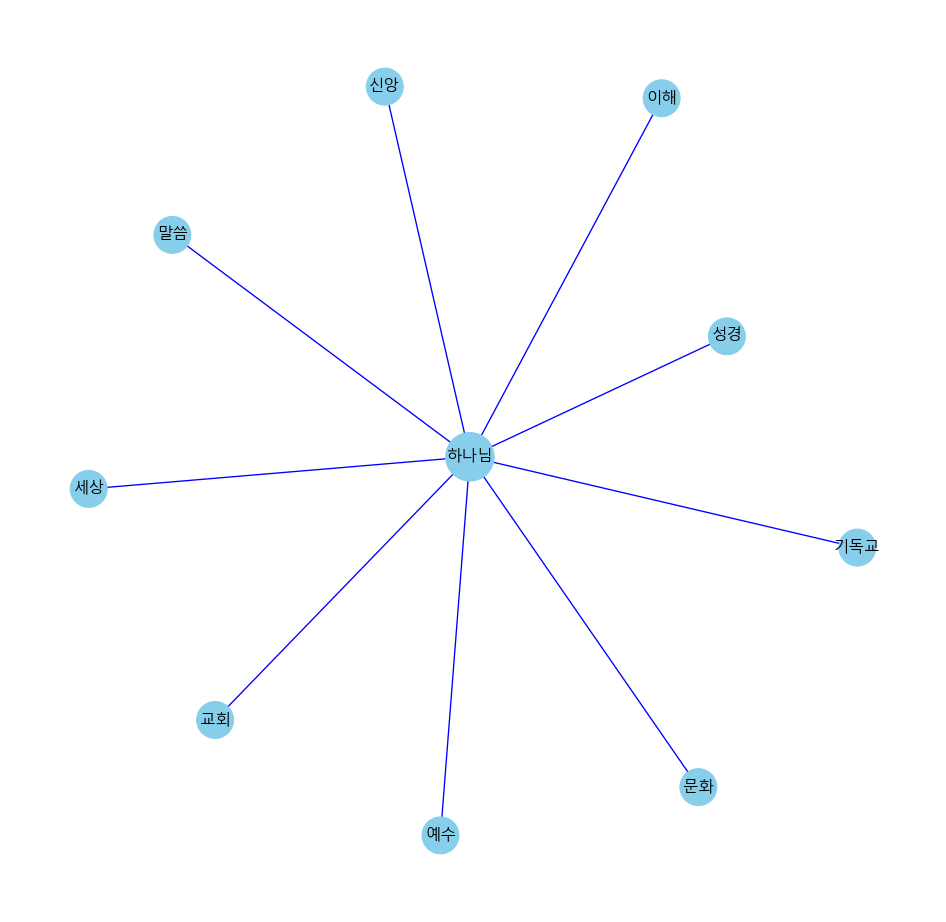

In [4]:
plot4kcc_keywords('종교')

### 13) 예술/대중문화

csv name: book_all
Category :예술/대중문화
It was saved visualization/예술_대중문화_keywords.png


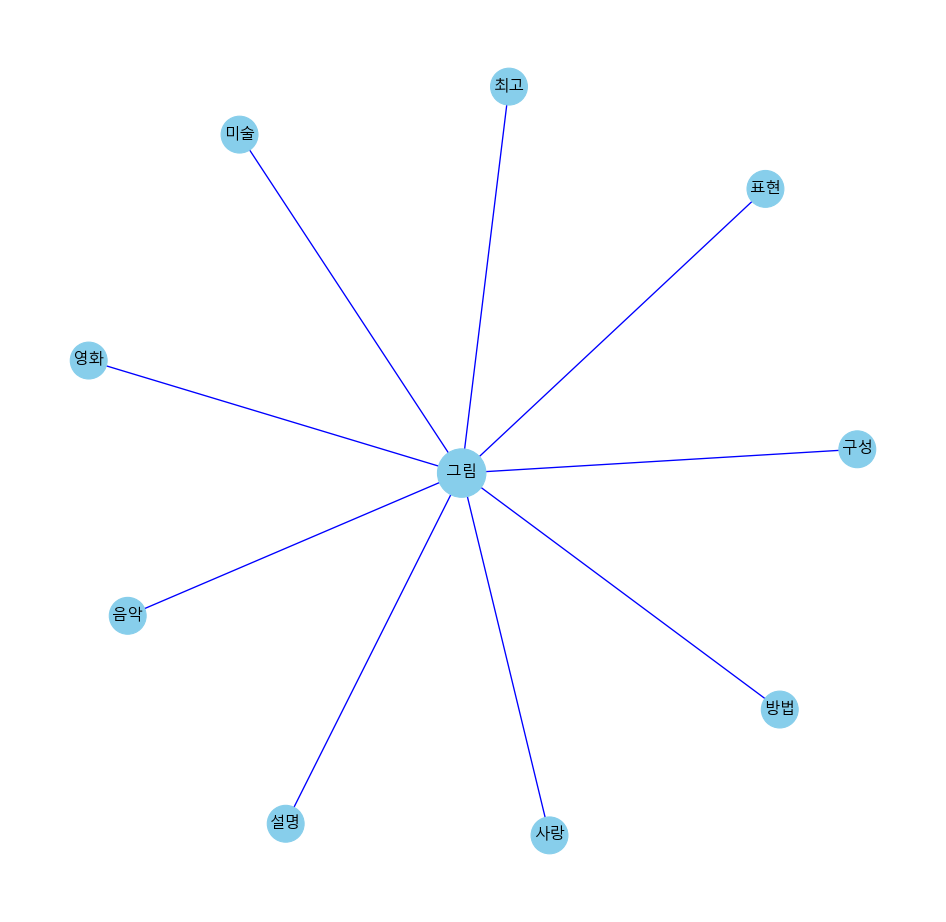

In [4]:
plot4kcc_keywords('예술/대중문화')

### 14) 기술/공학

csv name: book_all
Category :기술/공학
It was saved visualization/기술_공학_keywords.png


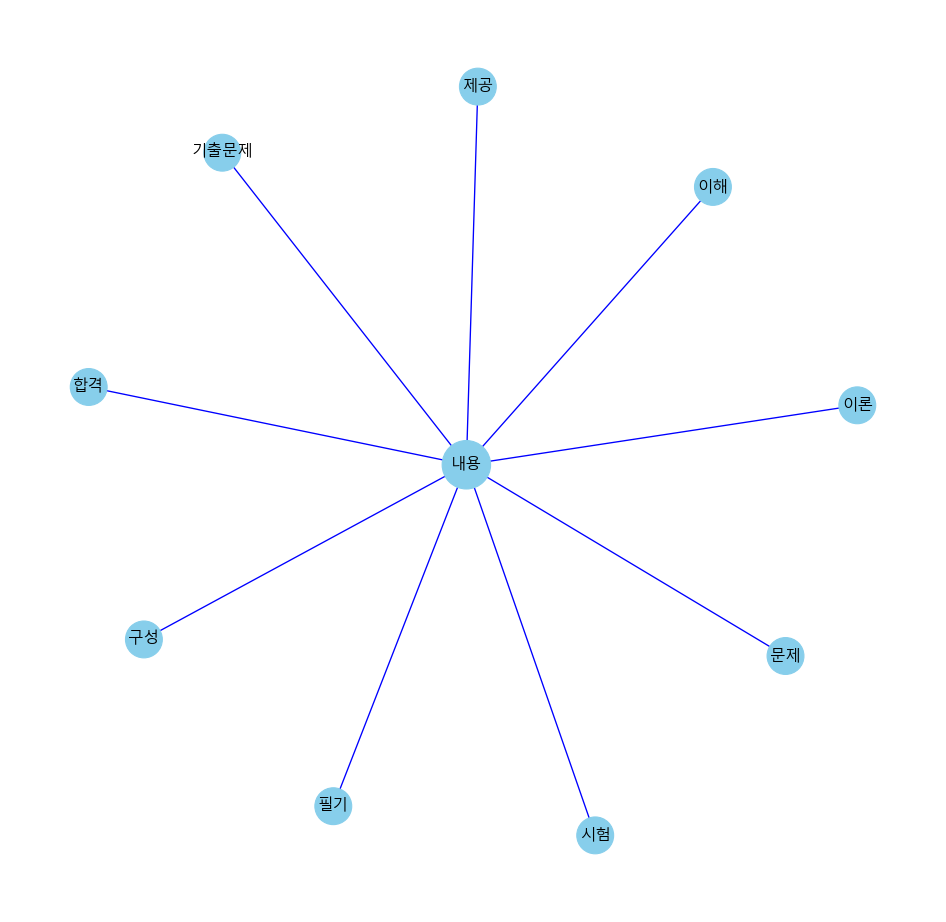

In [4]:
plot4kcc_keywords('기술/공학')

### 15) 외국어

csv name: book_all
Category :외국어
It was saved visualization/외국어_keywords.png


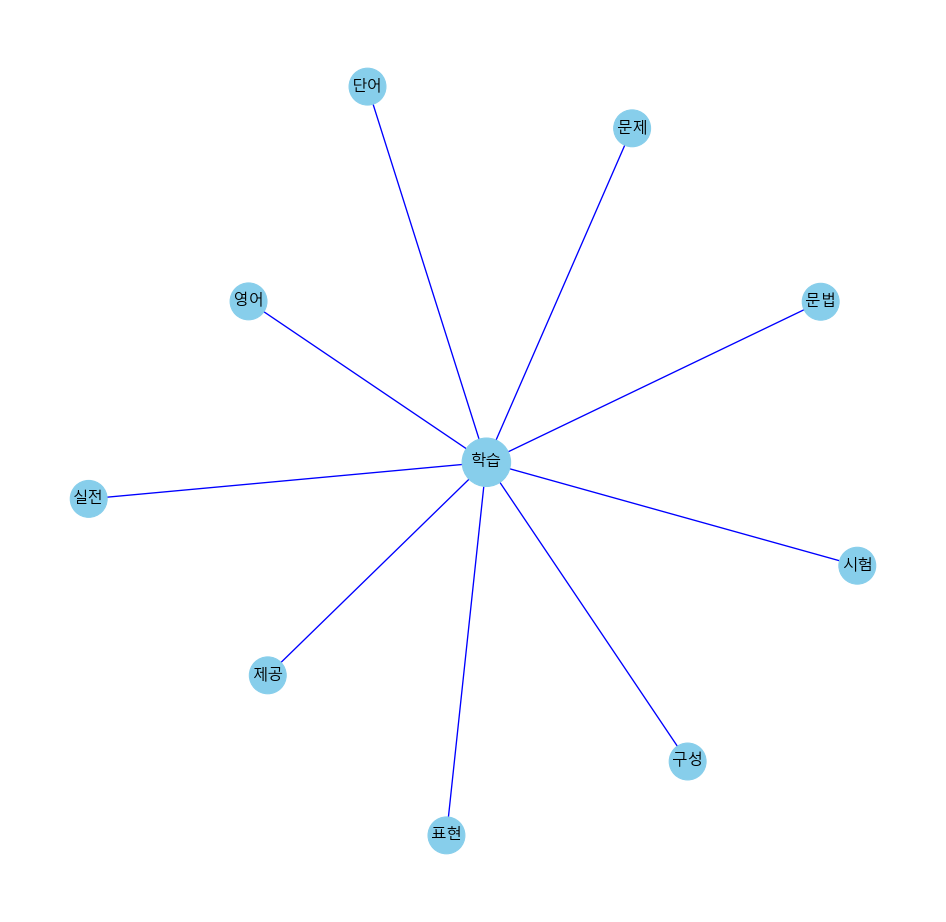

In [4]:
plot4kcc_keywords('외국어')

### 16) 과학

csv name: book_all
Category :과학
It was saved visualization/과학_keywords.png


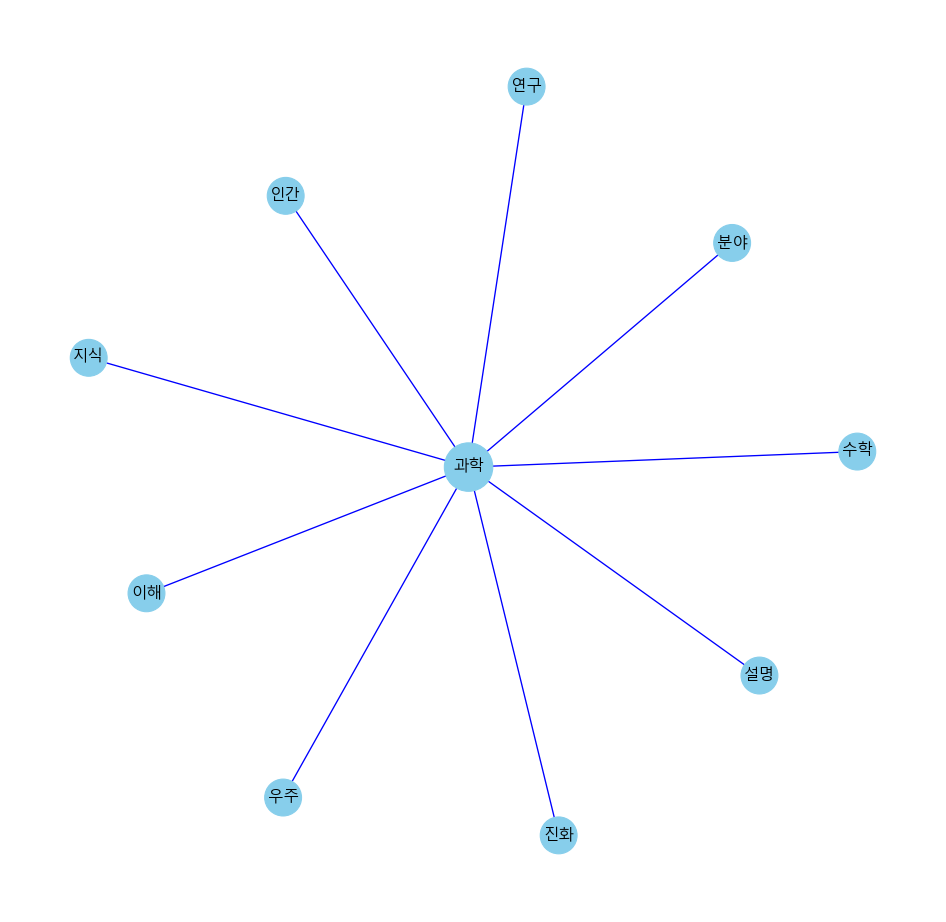

In [4]:
plot4kcc_keywords('과학')

### 17) 여행

csv name: book_all
Category :여행
It was saved visualization/여행_keywords.png


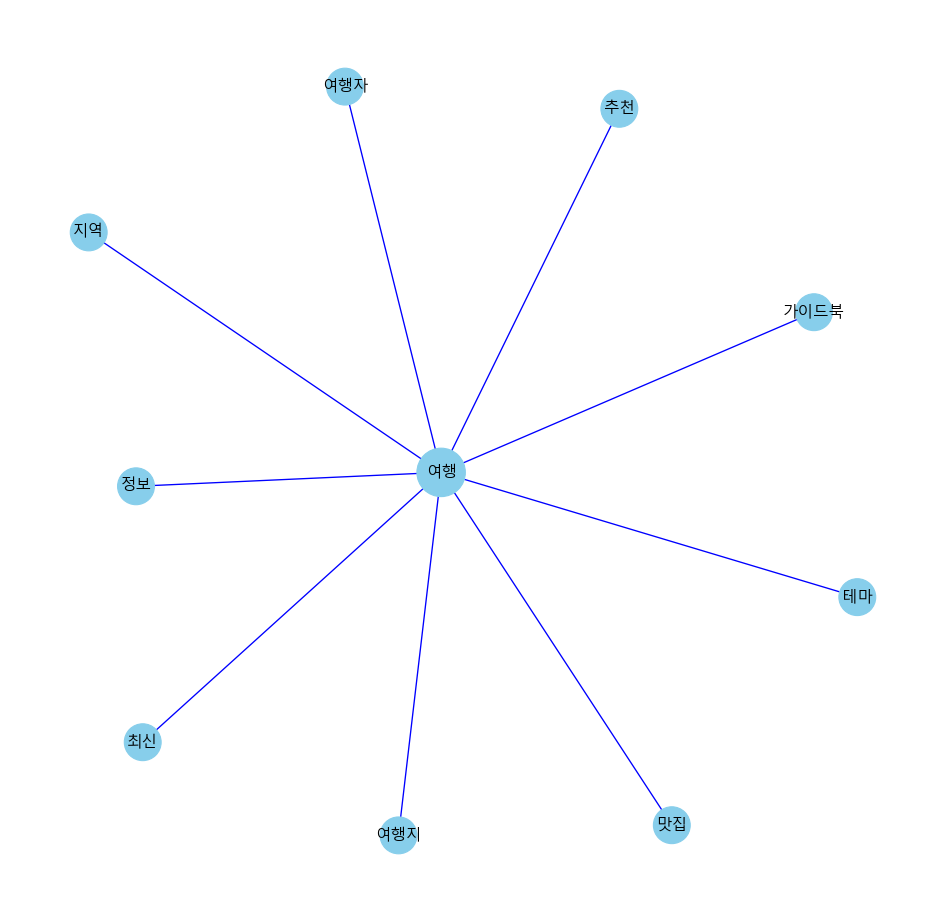

In [4]:
plot4kcc_keywords('여행')

### 18) 컴퓨터/IT

csv name: book_all
Category :컴퓨터/IT
It was saved visualization/컴퓨터_IT_keywords.png


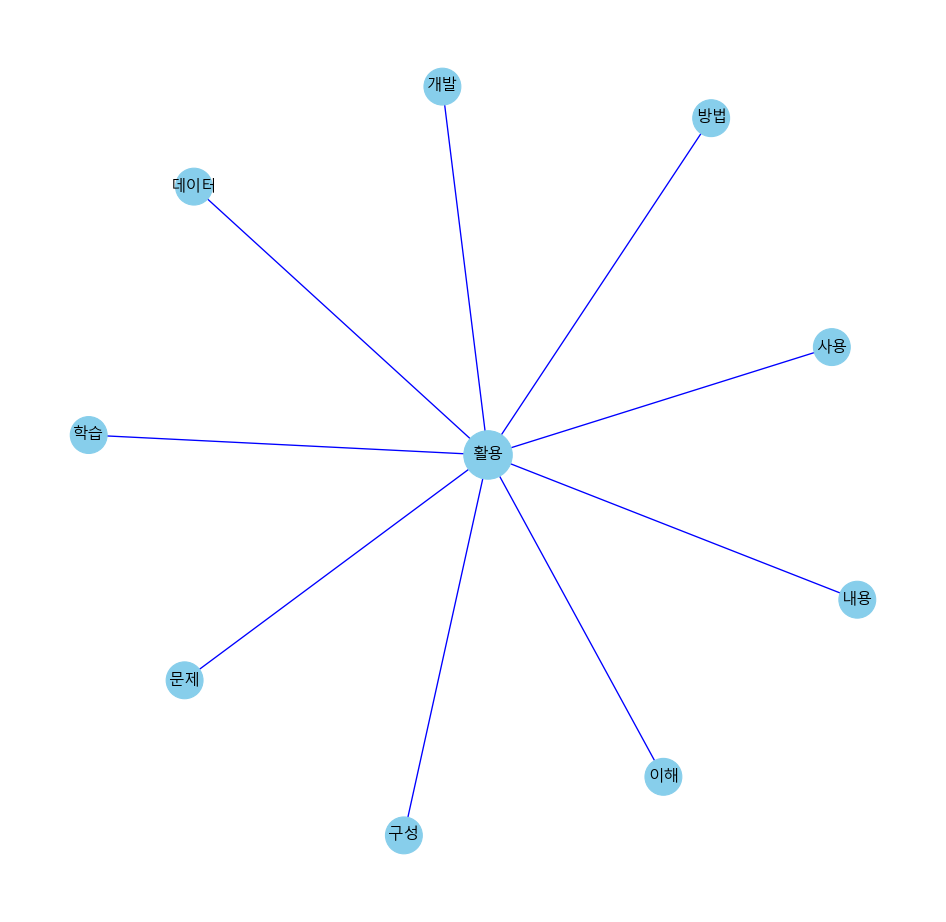

In [4]:
plot4kcc_keywords('컴퓨터/IT')

### 19) 잡지

csv name: book_all
Category :잡지
It was saved visualization/잡지_keywords.png


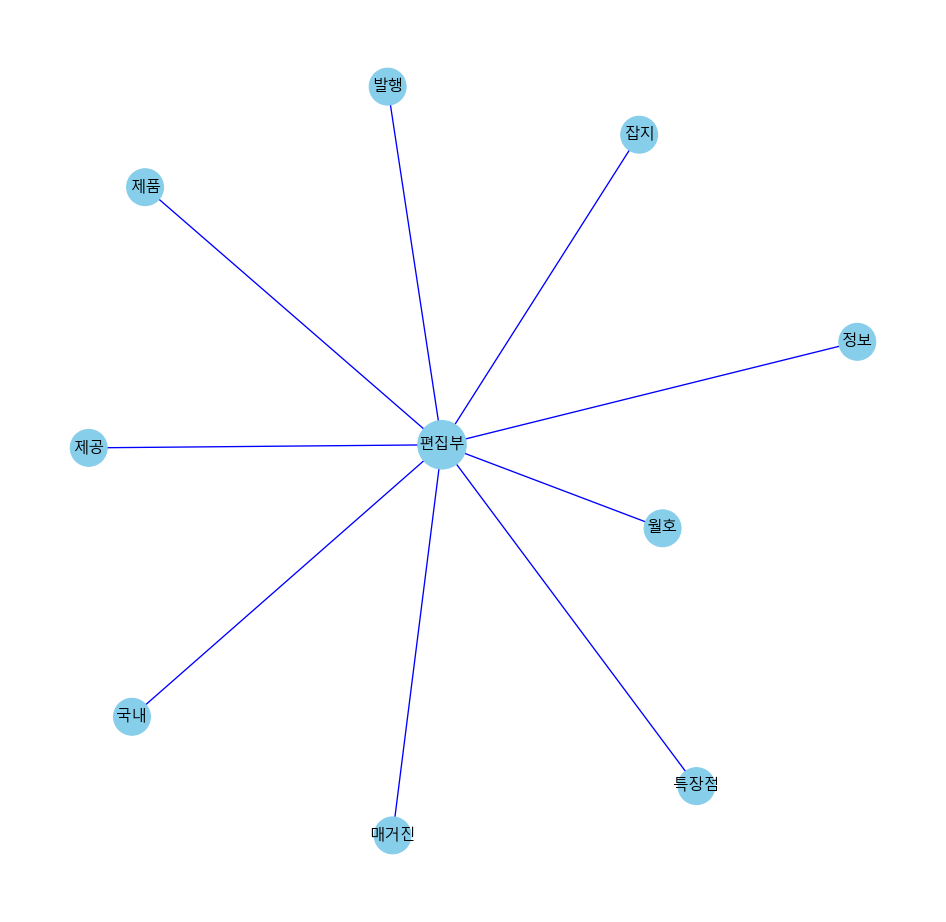

In [4]:
plot4kcc_keywords('잡지')

### 20) 청소년

csv name: book_all
Category :청소년
It was saved visualization/청소년_keywords.png


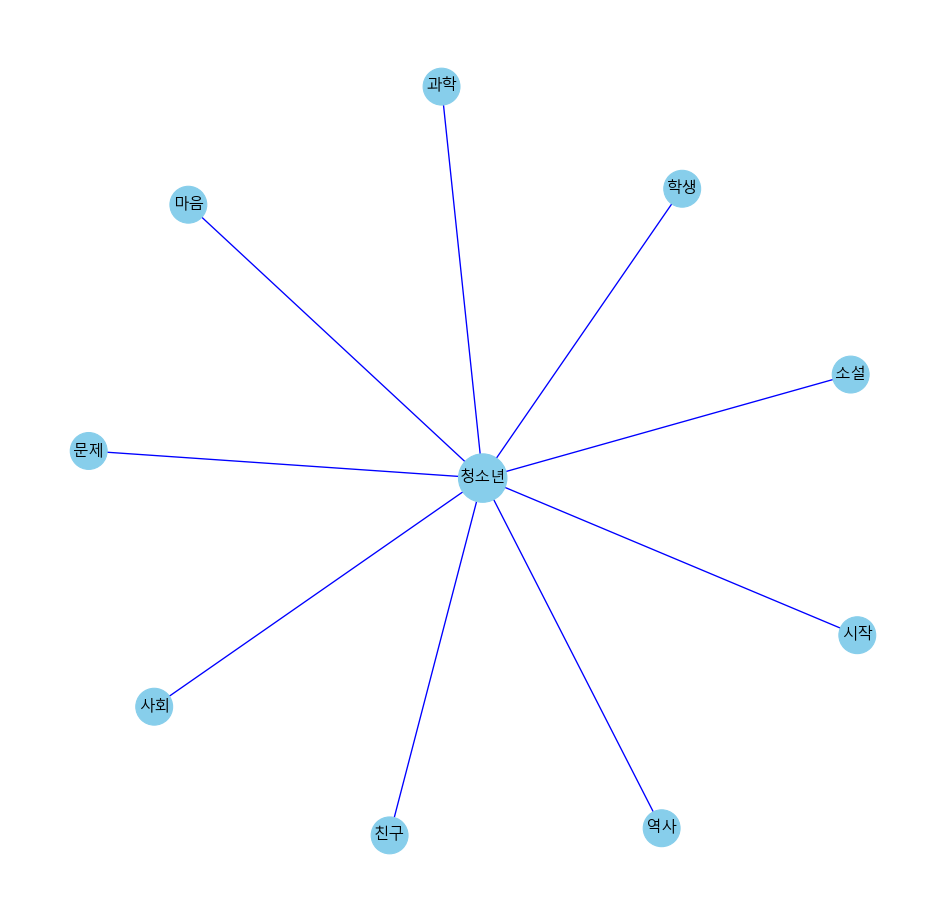

In [4]:
plot4kcc_keywords('청소년')